##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Meme Generator with Gemma 3

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemma-cookbook/blob/main/Gemma/[Gemma_3]Meme_Generator.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


In [ ]:
!pip install -q git+https://github.com/google-deepmind/gemma.git

## Load Gemma 3

In [ ]:
import os
from google.colab import userdata

# Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
# vars as appropriate for your system.
os.environ["KAGGLE_USERNAME"] = userdata.get("KAGGLE_USERNAME")
os.environ["KAGGLE_KEY"] = userdata.get("KAGGLE_KEY")

# Avoid memory fragmentation on JAX
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

import kagglehub

GEMMA_VARIANT = "gemma3-4b-it"
GEMMA_PATH = kagglehub.model_download(f'google/gemma-3/flax/{GEMMA_VARIANT}')
print(GEMMA_PATH)
CKPT_PATH = os.path.join(GEMMA_PATH, GEMMA_VARIANT)
TOKENIZER_PATH = os.path.join(GEMMA_PATH, 'tokenizer.model')
print('CKPT_PATH:', CKPT_PATH)
print('TOKENIZER_PATH:', TOKENIZER_PATH)

# Load model parameters and tokenizer
from gemma import gm

model = gm.nn.Gemma3_4B()
params = gm.ckpts.load_params(CKPT_PATH)
tokenizer = gm.text.Gemma3Tokenizer(TOKENIZER_PATH)

/root/.cache/kagglehub/models/google/gemma-3/flax/gemma3-4b-it/1
CKPT_PATH: /root/.cache/kagglehub/models/google/gemma-3/flax/gemma3-4b-it/1/gemma3-4b-it
TOKENIZER_PATH: /root/.cache/kagglehub/models/google/gemma-3/flax/gemma3-4b-it/1/tokenizer.model


## Step 1 and 2: Describe the tool and give a task

Input: A funny image of a cat

--2025-03-11 21:27:51--  https://github.com/bebechien/gemma/blob/main/images/surprise.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bebechien/gemma/raw/refs/heads/main/images/surprise.jpg [following]
--2025-03-11 21:27:51--  https://github.com/bebechien/gemma/raw/refs/heads/main/images/surprise.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bebechien/gemma/refs/heads/main/images/surprise.jpg [following]
--2025-03-11 21:27:52--  https://raw.githubusercontent.com/bebechien/gemma/refs/heads/main/images/surprise.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conn

array([[[150, 146, 139],
        [150, 145, 139],
        [151, 145, 138],
        ...,
        [130, 125, 117],
        [130, 124, 116],
        [131, 125, 116]],

       [[150, 147, 140],
        [149, 145, 139],
        [149, 145, 138],
        ...,
        [131, 126, 117],
        [130, 126, 118],
        [131, 125, 117]],

       [[149, 146, 139],
        [149, 146, 140],
        [150, 147, 141],
        ...,
        [132, 125, 118],
        [131, 126, 118],
        [131, 126, 117]],

       ...,

       [[  7,   4,   2],
        [  7,   4,   2],
        [  7,   4,   2],
        ...,
        [119, 113, 104],
        [119, 113, 103],
        [120, 112, 103]],

       [[  8,   4,   3],
        [  7,   4,   2],
        [  7,   3,   2],
        ...,
        [119, 113, 104],
        [119, 111, 104],
        [120, 112, 103]],

       [[  6,   4,   1],
        [  7,   2,   3],
        [  7,   3,   2],
        ...,
        [121, 113, 106],
        [119, 113, 105],
        [119, 113, 103]]], dtype=uint8)
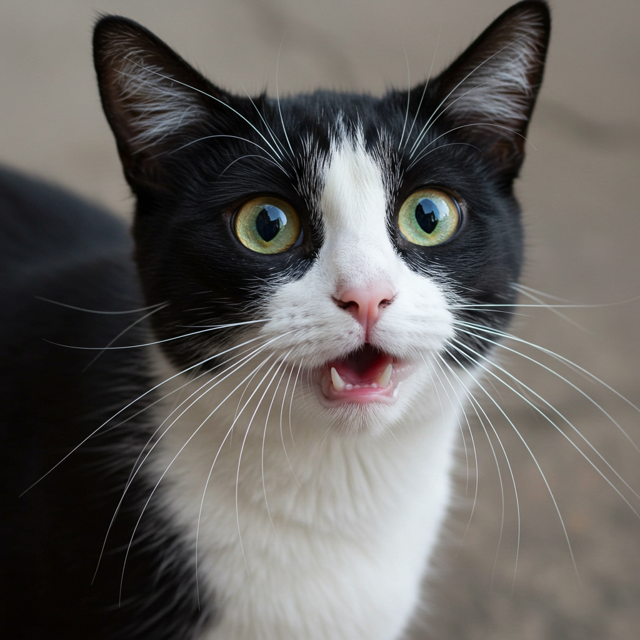

In [ ]:
import io
import requests
import numpy as np
from PIL import Image

def crop_and_resize(image, target_size=(640,640)):
    """A helper function the resizes given image to the given shape"""
    width, height = image.size
    source_size = min(image.size)
    left = width // 2 - source_size // 2
    top = height // 2 - source_size // 2
    right, bottom = left + source_size, top + source_size
    return image.resize(target_size, box=(left, top, right, bottom))

!wget "https://github.com/bebechien/gemma/blob/main/images/surprise.jpg?raw=true" -O "/content/meme.jpg"
imagefile = "/content/meme.jpg"
image = np.array(crop_and_resize(Image.open(imagefile)))
image

## Step 3: Gemma decides and requests a tool

In [ ]:
chatbot = gm.text.ChatSampler(
    model=model,
    params=params,
    multi_turn=False,
    tokenizer=tokenizer,
)

prompt = f"""<start_of_image>
If you decide to invoke any of the function(s), it should be wrapped with ```tool_code```.

You have access to the following tools.

* `generate_meme(image, top_text, middle_text, bottom_text)`: Generate a meme with the given parameters

Make a funny meme with this. "{imagefile}"
"""

result = chatbot.chat(prompt=prompt, images=image)
print(result)

Okay, I can do that! Let's create a funny meme based on the image of the surprised cat.

Here's the meme I'll generate:

**Image:** /content/meme.jpg (The image of the surprised cat)

**Top Text:** "Me when the vet says 'just a scratch'"

**Middle Text:** "Wait... what?"

**Bottom Text:** "Send help."

```tool_code
generate_meme(image="/content/meme.jpg", top_text="Me when the vet says 'just a scratch'", middle_text="Wait... what?", bottom_text="Send help.")
```


## Step 4: Tool does its job

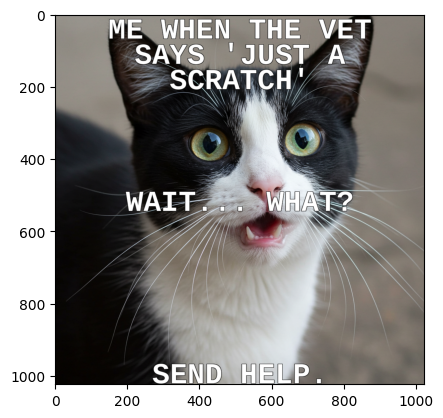

In [ ]:
import re
import ast

# Helper Functions
def extract_code_blocks(text):
  """
  Extracts code blocks enclosed in triple backticks
  """
  code_block_regex = r"`(.*?)`"
  blocks = re.findall(code_block_regex, text, re.DOTALL)

  cleaned_blocks = []
  for block in blocks:
    if len(block) <= 0:
      continue

    # Remove optional language specifier
    clean_block = block.strip()
    if '\n' in clean_block:
      clean_block = clean_block.split('\n', 1)[1]
    else:
      clean_block = clean_block
    cleaned_blocks.append(clean_block.strip())

  return cleaned_blocks

def parse_function_call_args(call_string):
  """
  Parses a function call string and extracts the arguments
  """
  try:
    # Use ast.parse to safely parse the string into an AST node.
    tree = ast.parse(call_string, mode='eval')

    # Check if the parsed expression is a function call.
    if not isinstance(tree.body, ast.Call):
      return None, None

    call_node = tree.body

    # Extract function name.
    function_name = call_node.func.id

    # Extract keyword arguments.
    kwargs = {}
    for keyword in call_node.keywords:
      kwargs[keyword.arg] = ast.literal_eval(keyword.value)

    return function_name, kwargs

  except (SyntaxError, ValueError):
    # Handle cases where the input string is not a valid Python expression
    # or contains unsupported features for ast.literal_eval.
    return None, None

###########################
# Meme Generator Function #
###########################
from PIL import Image, ImageDraw, ImageFont
import textwrap

def generate_meme(image, top_text, middle_text, bottom_text):
  img = Image.open(image)
  draw = ImageDraw.Draw(img)
  image_width, image_height = img.size

  # Calculate font size based on image height
  font_size = int(image_height * 0.08) # Adjust as needed
  font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", font_size)
  fill_color = "white"
  stroke_color = "black"

  # Calculate stroke width
  stroke_width = max(1, int(font_size * 0.02))

  def draw_text(text, position):
    lines = textwrap.wrap(text.upper(), width=image_width // (font_size // 1.5))
    line_height = font.getbbox("A")[3] + 2

    if position == 'top':
      y = 0
    elif position == 'middle':
      y = (image_height - len(lines) * line_height) // 2
    else:  # bottom
      y = image_height - len(lines) * line_height

    for line in lines:
      line_width = font.getbbox(line)[2]
      x = (image_width - line_width) // 2
      for dx, dy in [(-stroke_width, -stroke_width), (-stroke_width, stroke_width),
                     (stroke_width, -stroke_width), (stroke_width, stroke_width),
                     (0, -stroke_width), (0, stroke_width), (-stroke_width, 0),(stroke_width,0)]:
        draw.text((x + dx, y + dy), line, font=font, fill="black")

      draw.text((x, y), line, font=font, fill="white")
      y += line_height

  draw_text(top_text.upper(), 'top')
  draw_text(middle_text.upper(), 'middle')
  draw_text(bottom_text.upper(), 'bottom')

  return img

import matplotlib.pyplot as plt

calls = extract_code_blocks(result)
total = len(calls)

for i, call in enumerate(calls):
  parsed = parse_function_call_args(call)
  if(parsed[0] == 'generate_meme'):
    # Call API
    args = parsed[1]
    meme_img = generate_meme(args['image'], args['top_text'], args['middle_text'], args['bottom_text'])
    plt.subplot(total, 1, i+1)
    plt.imshow(meme_img)

plt.show()
